In [1]:
from langchain.messages import HumanMessage, SystemMessage, AIMessage
from langchain_openai import ChatOpenAI

In [ ]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
res = llm.invoke([HumanMessage("Hello!")])
res

In [9]:
messages = [AIMessage("Hello! How can I assist you today?")]

messages.append(HumanMessage("Can you explan me the History of Iranian Revolution"))

messages.append(AIMessage("Sure! Where do you wanna start?"))

messages.append(HumanMessage("From the overthrow of Pahlavi"))

In [ ]:
from pprint import pprint

for i in messages:
    i.pretty_print()

In [ ]:
response = llm.invoke(messages)

In [15]:
response.pretty_print()

================================== Ai Message ==================================

The Iranian Revolution, also known as the Islamic Revolution, began with the overthrow of the Pahlavi dynasty, specifically the Shah of Iran, Mohammad Reza Pahlavi. The Shah was seen as a dictator who ruled with the support of the United States and other Western powers, while suppressing political dissent and opposition.

The revolution was a culmination of years of social, political, and economic discontent in Iran. The Shah's regime was criticized for its authoritarianism, corruption, and perceived Westernization at the expense of Iranian culture and values. The opposition to the Shah was led by a diverse coalition of groups, including religious leaders, intellectuals, students, and workers.

The revolution gained momentum in 1978 with widespread protests and strikes across the country. The situation escalated in early 1979, leading to the Shah fleeing Iran in January and the establishment of an interim

In [ ]:
response.response_metadata

## Bindings tools to Models

In [18]:
def add(m : int, n : int) -> int:
    """ Returns the sum of two integers.

        Args:
            m (int): The first integer.
            n (int): The second integer.
    """
    return m + n

In [21]:
bindedLLM = llm.bind_tools([add])

In [ ]:
tool_call = bindedLLM.invoke([HumanMessage("What is the result when 893 is added to 2?")])
tool_call.tool_calls

### Messages as State

In [28]:
from typing import TypedDict, Annotated
from langchain.messages import AnyMessage
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages : Annotated[list[AnyMessage], add_messages]

In [29]:
#LangGraph has a pre-built function to do all that has been done above

from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    pass

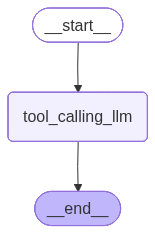

In [31]:
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph

#Defining a node here
def tool_calling_llm(state : MessagesState):
    return { "messages" : [bindedLLM.invoke(state["messages"])]}

builder = StateGraph(MessagesState)

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
msg = graph.invoke({"messages" : [HumanMessage("Can we add 54 and 2?")]})

for i in msg["messages"]:
    i.pretty_print()

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


================================ Human Message =================================

Can we add 54 and 2?
================================== Ai Message ==================================
Tool Calls:
  add (call_ZMAvZQ317S8zKj6bdc5dcUF2)
 Call ID: call_ZMAvZQ317S8zKj6bdc5dcUF2
  Args:
    m: 54
    n: 2


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


### Things learnt here

1 - Invoking an LLM 
2 - TypedDict from typing
3 - Type Hints
4 - Type checkers - mypy 
5 - Passing inputs through nodes as states
6 - Reducers - Annotated, built-in : add_messages
7 - Prebuilt MessageState state in langgraph
8 - binding tools to llms bind_tool func